In [55]:
from dasquakes import *
#!pip install tqdm
#from run_pca import *
import datetime
import numpy as np
#fix the problem with tqdm

# 1. Choose the following parameters to select data to examine

In [70]:
cable='whidbey'
record_length = 5  #minutes
t0 = datetime.datetime(2022, 5, 20, 7, 0, 0)

# 2. Run the functions to return the data

In [71]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)

data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=False)

# 3. Use $attrs$ to see the aquisition parameters

In [72]:
nt = data.shape[0]
nx = data.shape[1]
#print(f'Number of time steps: {nt}, Number of channels: {nx}')
#print(nt)
#print(nx)
#print(data.shape)
#print (f"Nyquist Frequency: {attrs['MaximumFrequency']} Hz, cable length: {attrs['SpatialSamplingInterval']*nx} m")

# 4. Make a simple plot of the data

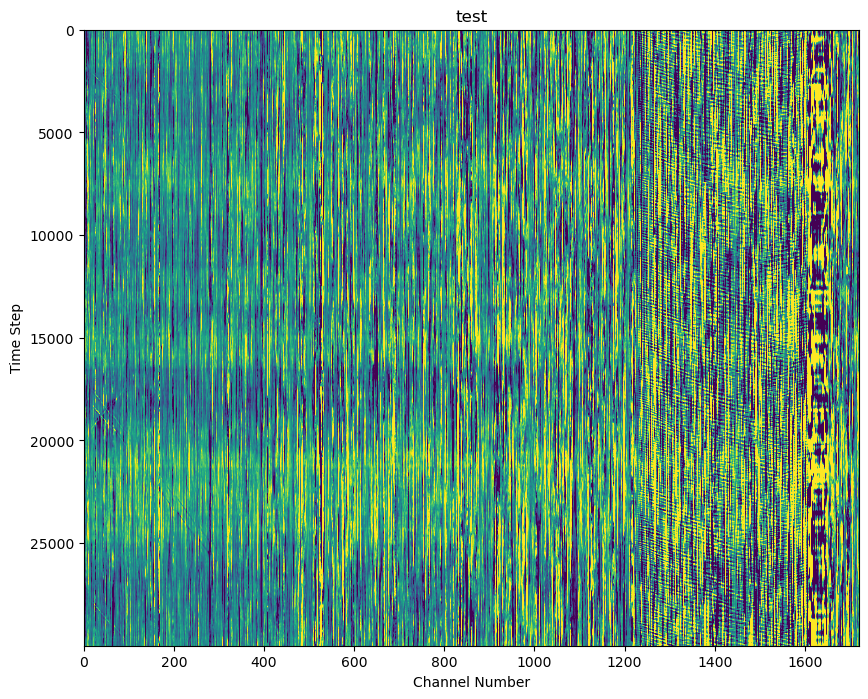

In [75]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
plt.imshow(data,aspect='auto',vmin=-1,vmax=1)
plt.title('test')
plt.xlabel('Channel Number')
plt.ylabel('Time Step')
plt.savefig('5test.pdf', format="pdf")
plt.show()
#my own to do
#save 2 different images in PNG, THEN COMPARE THAT (DIFFERENT TIME_LENGHT 1 MIN Y 5 MIN), ready 
#save lo mismo pero 1 mes después.
#save lo mismo un mes después.

# Calculate fourier transform.

In [79]:
#fk_anaylisis is a function that return, f frecuency, number of wave k, and ft.
ft,f,k = fk_analysis(t0,draw_figure=False, cable = 'whidbey', record_length = 20)
#ft = fftshift(fft2(downsampled_subsea_data))
# f = fftshift(fftfreq(downsampled_subsea_data.shape[0], d=0.01 * downsamplefactor)), relate with time step (nt)
# k=   k = fftshift(fftfreq(downsampled_subsea_data.shape[1], d=attrs['SpatialSamplingInterval'])) related with channels
#print(ft)
#print(f.shape)
#print(f)


Text(0, 0.5, 'Frequency (Hz)')

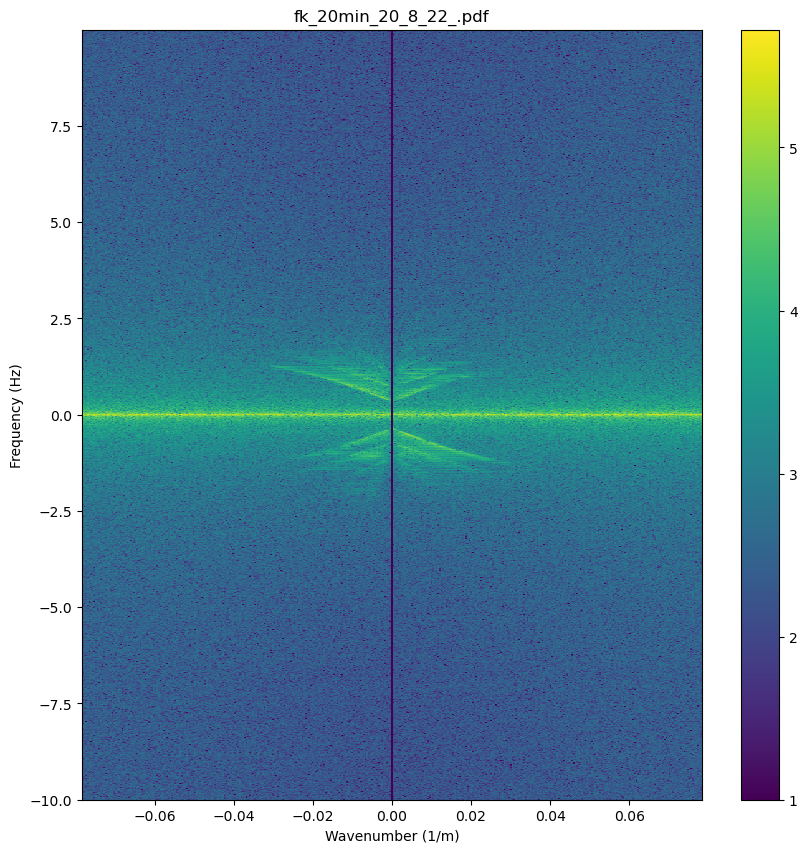

In [80]:
#creating fk plot for t0
plt.subplots(figsize=(10,10))
c=plt.pcolormesh(k,f,np.log10(np.abs(ft)),vmin=1)
plt.colorbar(c)
plt.title('fk_20min_20_8_22_.pdf')
plt.xlabel('Wavenumber (1/m)')
plt.ylabel('Frequency (Hz)')
#plt.savefig('fk_10min_5_8_22.pdf', format="pdf")

In [ ]:
#SEE CHANGES IN FK plot if we changes the time of duration?, let see! no changes because ...
#fk_analysis defind record lenght = 1min
#Ask Brad to be sure about 
#Describe the data archive and its accordance with FAIR principles. 
#Describe data curation, preprocessing, data storage strategy, data format, data size, and data labeling (if applicable).
#implement run pca.
#change the directory



